# O problema de time series

- Série Temporal = Funçao que depende do tempo

- Sazonalidade 
- Tendência
- Resíduo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Tendência - direção
# Sazonalidade (recorrência das oscilações) - entender como funcionam as oscilações da série temporal
# Resíduo - o que sobra do sinal

df = pd.read_csv('https://raw.githubusercontent.com/camimq/machine_learning_and_time_series/main/03_analise_de_series_temporais/bases/Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
# transforma a coluna Index em uma coluna de data no formato MM/DD/AAAA
df.index = pd.to_datetime(df.DATE, format = '%m-%d-%Y')

In [9]:
# DROPA coluna DATE
# axis = 1 - indica  que é pra deletar a coluna DATA
df.drop('DATE', inplace = True, axis = 1)

In [10]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [12]:
# a data virou índice
# localiza pelo índice, que agora é uma data
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

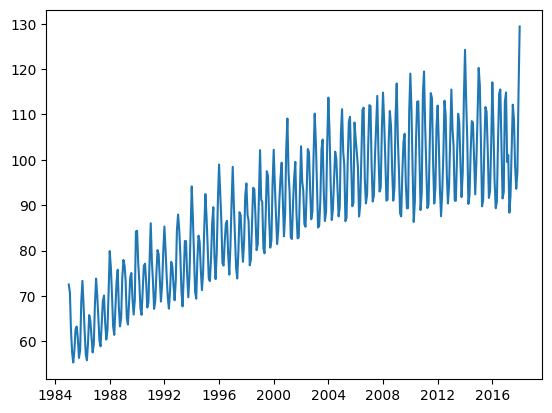

In [14]:
# plota o padrão da série temporal
plt.plot(df.index, df.Value)

In [15]:
# Decomposição de série temporal
resultados = seasonal_decompose(df)

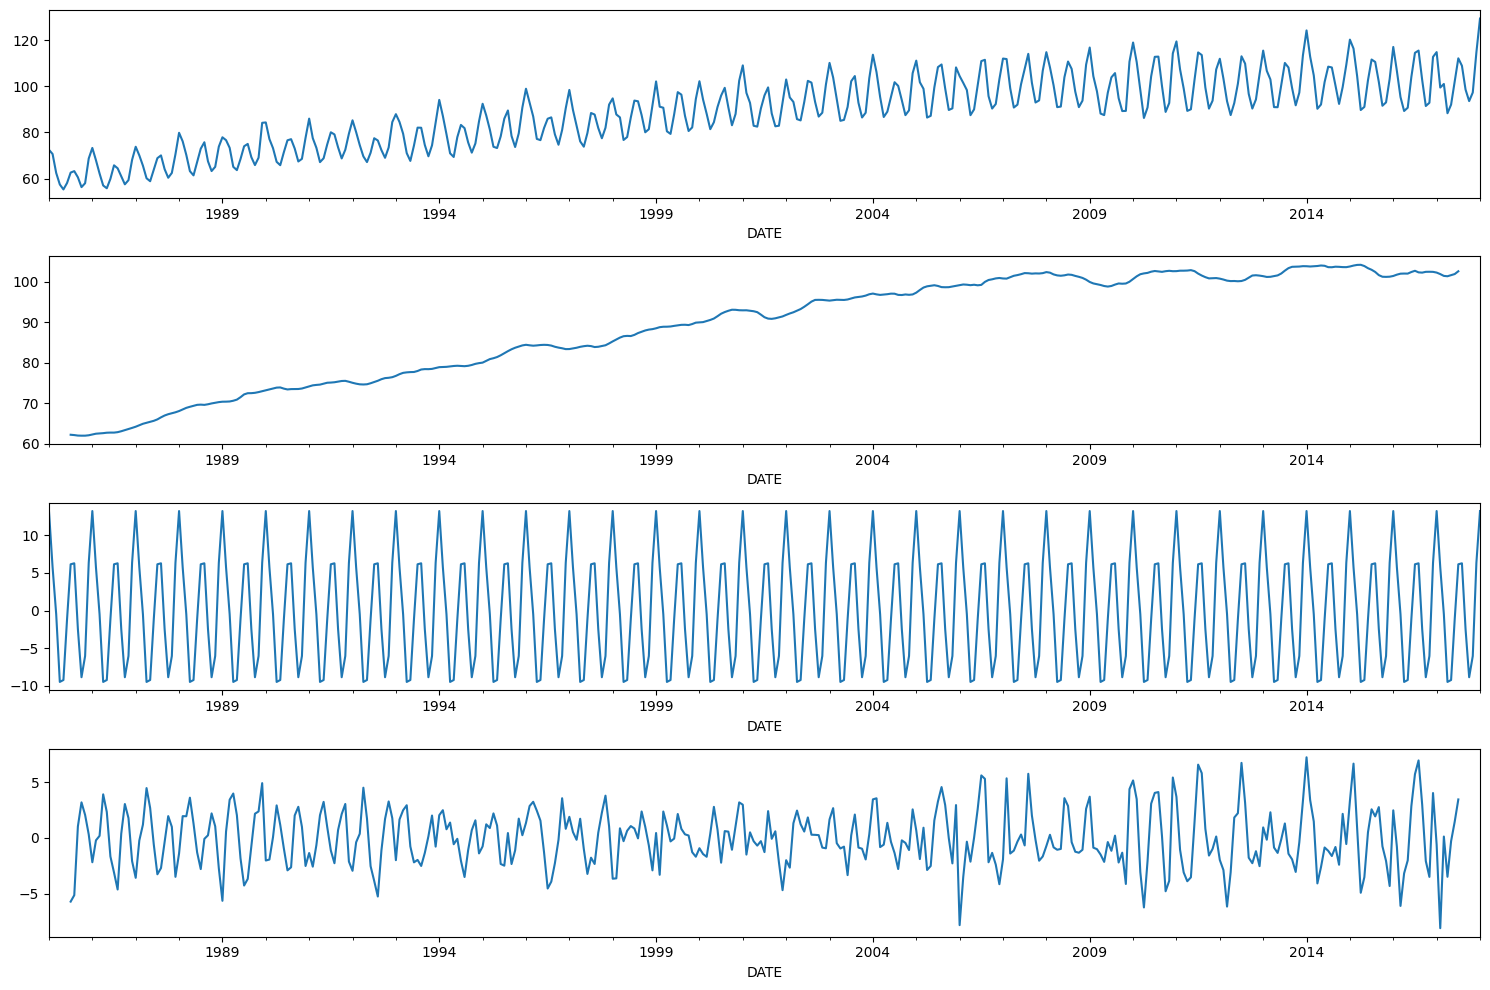

In [18]:
# cria

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()


### Conceitos Estatísticos | Série Tempora Estacionária ou Não Estacionária

- **Série Temporal Estacionária**: movimentação constante. É uma série temporal em que a média, variância e co-variância dos dados, não desloca no tempo.
- **Série Temporal Não Estacionária**:  não é uma movimentação constante, é variável. É uma série temporal em que a média, variância e co-variância dos dados varia com o tempo.

In [19]:
# Estacionária ou não estacionária
# Teste ADF - Augmented Dickey-Fuller Test (determina se existe ou não uma estacionariedade de uma série temporal)

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula; estacionária)

# pvalue = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
sns.set_style('darkgrid')

In [22]:
X = df.Value.values

In [ ]:
result = adfuller(X)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key} : {value}')